# Soring Clothes Using Tensorflow 2.0

> This notbook walks through building a machine learning model that identifies and sorts clothes from the Keras pre-saved dataset. This dataset has 60,000 images.


In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
print(tf.__version__)

2.3.0


In [8]:
# Import and split the data into train and test sets
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

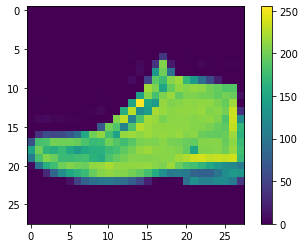

In [11]:
# Show the image and the shades of color present in the image
plt.figure()
plt.imshow(train_images[1232])
plt.colorbar()
plt.show()

### Preprocess the Data Set

In [12]:
train_images = train_images/255
test_images = test_images/255

In [13]:
class_names = ["T-shirts", "Shorts", "Hoodie", "Dress", "Coat", "Sandal", "Shirt", "Shoes", "Bag", "Boots"]

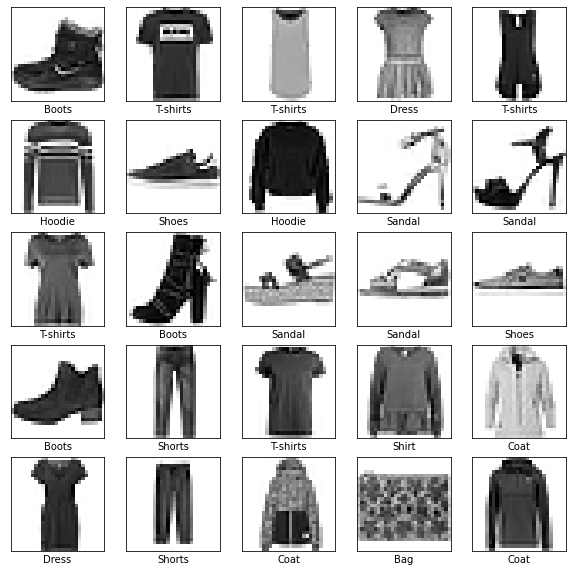

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
# Compile the model
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [17]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5035 - accuracy: 0.8222
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3346 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3112 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2799 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2683 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

### Make predictions using the trained model above.

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8796


In [20]:
predictions = model.predict(test_images)
predictions

array([[4.1632350e-07, 7.3294135e-11, 2.2103572e-10, ..., 5.2933739e-03,
        7.8423668e-09, 9.9465066e-01],
       [4.6683243e-05, 5.0045214e-15, 9.9323070e-01, ..., 1.6100813e-17,
        1.1382116e-09, 6.9346506e-19],
       [4.0826609e-09, 1.0000000e+00, 1.4668920e-12, ..., 3.6881515e-24,
        1.8509699e-14, 9.3827417e-16],
       ...,
       [1.1183386e-05, 1.6985599e-10, 1.0115591e-05, ..., 5.8230740e-11,
        9.9997211e-01, 2.4080984e-13],
       [1.2161850e-08, 9.9999666e-01, 1.7294123e-11, ..., 8.2468534e-18,
        2.9044397e-08, 1.7719974e-12],
       [9.1103684e-05, 1.0770944e-07, 1.4314379e-05, ..., 1.6770179e-03,
        2.1613830e-04, 4.3913467e-05]], dtype=float32)

In [21]:
len(test_images)

10000

In [22]:
len(predictions)

10000

Each element in the `predictions` array represents the confidence the that the image corresponds to the different image classes.

In [23]:
predictions[0]

array([4.1632350e-07, 7.3294135e-11, 2.2103572e-10, 5.6324369e-11,
       7.7917145e-10, 5.4334723e-05, 1.2860088e-06, 5.2933739e-03,
       7.8423668e-09, 9.9465066e-01], dtype=float32)

### Evaluate the Model

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"
  
  plt.xlabel("Predicted: {} {:2.0f}% Actual: {}".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

In [25]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("green")

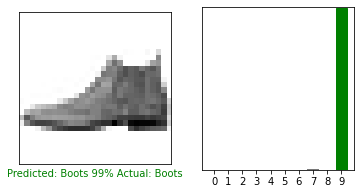

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

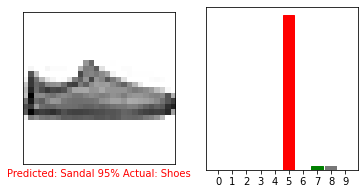

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [28]:
# Create a function to show a custom item from the test data
def show_prediction(i=0, predictions=predictions, test_labels=test_labels, test_images=test_images, random=False):
  """
  Shows a prediction from the test data with its prediction and graph. 
  Set `random=True` for a random item. Choose an item by setting `i` to an int between 0 and 10,000.
  """
  if random == True:
    i = np.random.randint(0, 9999)
  if i > 9999 or i < 0:
    return print("i can't be greater than 9999 or less than 0")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

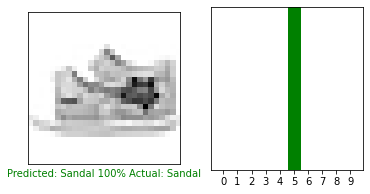

In [29]:
show_prediction(9999, random=False)

In [30]:
show_prediction(10000)

i can't be greater than 9999 or less than 0


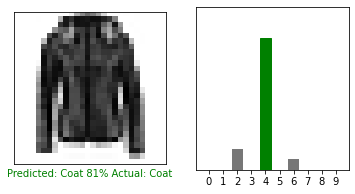

In [31]:
show_prediction(i=2323)

### 500 images with their accuracy graphs

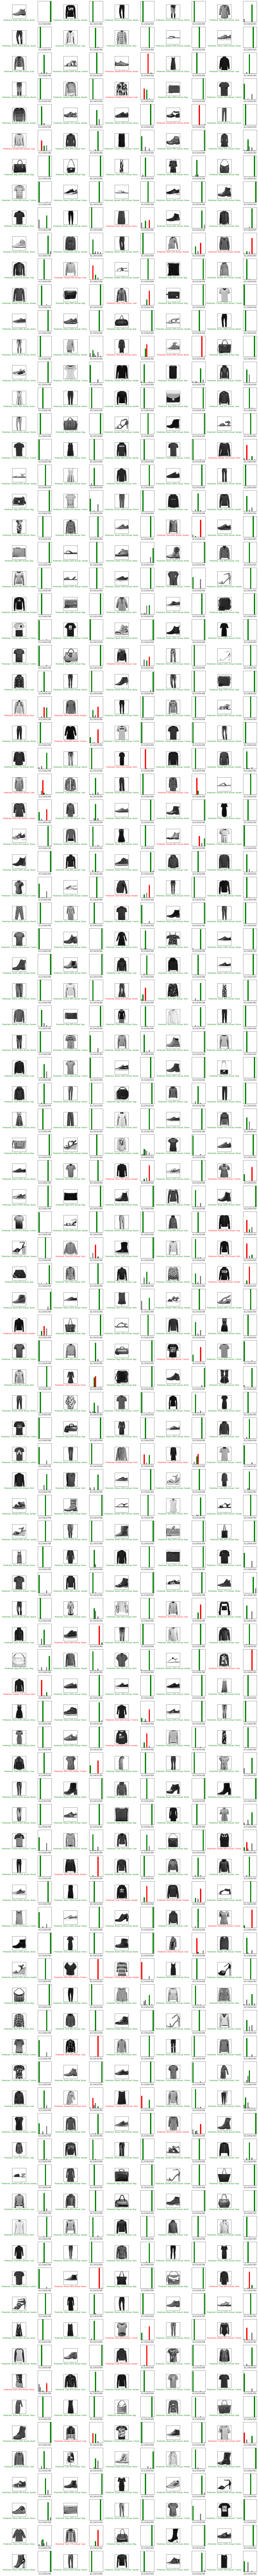

In [35]:
%timeit
rows = 100
cols = 5

num_images = rows * cols
plt.figure(figsize=(4*cols, 2*rows))

for i in range(num_images):
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [36]:
test_accuracy

0.8795999884605408

## The accuracy of the model is about 88%